In [25]:
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pylab
from numpy import ndarray
%matplotlib inline

Рассмотрим $X_1, ..., X_n ~ Bern(\theta)$. По сетке значений $\theta \in  [0, 1]$ с шагом $0.01$ построим график зависимости нижней оценки дисперсии произвольной несмещенной оценки из неравенства Рао-Крамера от $\theta$. 

По неравенству Рао-Крамера $D_\theta \hat{\theta} \geq \frac{1}{I_x(\theta)}$. Так же знаем, что информация Фишера $I_x(\theta) = \frac{n}{\theta(1 - \theta)}$ (книга "Введение в математическую статистику." стр.34). Оттуда же, что $\bar{X}$ - эффективная оценка $\theta$.(Просто используем критерий эффективности для $u_\theta(X) = \frac{n}{\theta(1 - \theta)}(\bar{X} - \theta)$). 

In [7]:
# Сетка значений theta.
grid_theta = np.linspace(0.,1.,num=1. / 0.01)

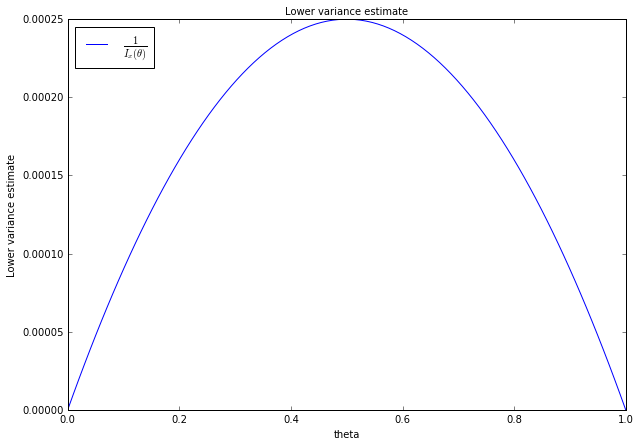

In [22]:
# Построим график при фиксированном n = 1000.
n = 1000
plt.figure(figsize=(10, 7))
plt.xlabel("theta")
plt.ylabel(r"Lower variance estimate")
plt.plot(grid_theta, [(j * (1 - j) / n) for i,j in enumerate(grid_theta)], color='b', label=r"$\frac{1}{I_x(\theta)}$")
plt.title(r'Lower variance estimate', fontsize=10)
plt.legend(fontsize=15, loc=2)
plt.show()

По графику видно, что нижняя оценка дисперсии, достигает своего максимального значения в районе $\theta = 0.5$ а к левому и правому краю убывает к 0. Это накладывает ограничения на дисперсию несмещенных оценок при различных $\theta$. Наилучших оценок по видимому можно будет добиться при $\theta$ около 0 и 1.

Для каждого значения $\theta$ (для той же сетки) сгенерируем выборку размера $n = 1000$ для параметра $\theta$, посчитаем эффективную оценку $\theta$ и бутстрепную оценку дисперсии (параметрический бутстреп, количество бутстрепных выборок равно 500)
этой эффективной оценки $\theta$. Нарисуем график зависимости полученных бутстрепных оценок от $\theta$.

In [44]:
def do_task(n=1000, k=500, ylim=0):
    # Массив выборочных дисперсий.
    sample_dispersion = np.zeros(len(grid_theta))
    for ind, theta in enumerate(grid_theta):
        # Генерируем выборку размера n для параметра theta
        sample = stats.bernoulli.rvs(theta, size=n)
        # Посчитаем эффективную оценку theta.
        effective_estim = np.average(sample)
        # Посчитаем бутстрепную оценку дисперсии этой эффективной оценки.
        bootstrap_estimations_array = np.zeros(k)
        for i in range(k):
            # Параметрический бутстреп.
            X = stats.bernoulli.rvs(effective_estim, size=n)
            bootstrap_estimations_array[i] = np.average(X)
        # Выборочная дисперсия.
        sample_dispersion[ind] = np.var(bootstrap_estimations_array)
        
    # Строим график.
    plt.figure(figsize=(10, 7))
    plt.xlabel("theta")
    plt.ylabel(r"Dispersion")
    plt.plot(grid_theta, sample_dispersion, color='b', label=r"sample dispersion")
    # Нижняя оценка на дисперсию.
    plt.plot(grid_theta, [(j * (1 - j) / n) for i,j in enumerate(grid_theta)], color='g', label=r"$\frac{1}{I_x(\theta)}$")
    if ylim !=0:
        pylab.ylim(0, ylim1)
    plt.title(r'Sample(bootstrap) dispersion', fontsize=10)
    plt.legend(fontsize=15, loc=2)
    plt.show()

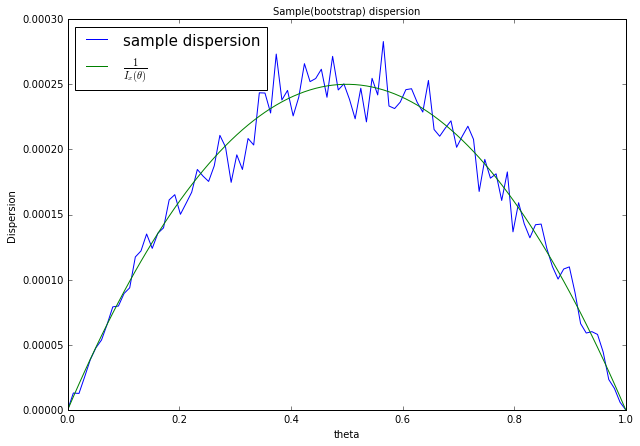

In [45]:
do_task()

### Вывод. Как видим, в неравенстве Рао-Крамера, с небольшими отклонениями, действительно достигается равенство, а значит оценка $\bar{X}$ действительно эффективная.

Comment